## Problem Set 3: Neural Networks

### Overview
In this problem set, you'll explore the foundational concepts of neural networks, covering basic architecture, activation functions, forward propagation, regularization, and adaptive learning. You'll also complete coding exercises to implement neural network components and train a basic neural network. You will both complete this Python script (`ps3.ipynb`) and submit a LaTeX report (`ps3.tex` and `ps3.pdf`).

## 1. Basic Architecture of a Neural Network

A neural network is composed of layers of neurons: input layer, hidden layer(s), and an output layer. Each neuron receives inputs, processes them, and passes the result to the next layer.

In this section, you'll implement a basic 3-layer neural network structure.

In [8]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(0)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

## 2. Activation Functions


Activation functions introduce non-linearity into the network, allowing it to learn more complex patterns. Common functions include:

- **Sigmoid**: S-shaped curve, useful for binary classifications.
- **ReLU (Rectified Linear Unit)**: Outputs zero if input is negative, otherwise outputs the input.
- **Leaky ReLU**: Similar to ReLU but with a small gradient for negative inputs.

### Exercise:
Write functions for each activation function and plot them over a range of inputs.


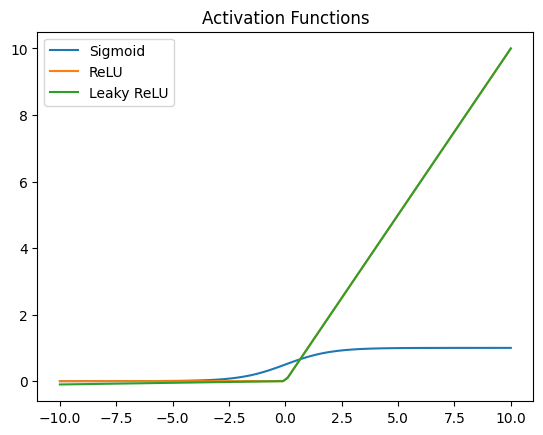

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.plot(x, relu(x), label="ReLU")
plt.plot(x, leaky_relu(x), label="Leaky ReLU")
plt.legend()
plt.title("Activation Functions")
plt.show()





## 3. Forward Propagation

Forward propagation is the process of passing inputs through the network to generate an output.

### Exercise:
Implement forward propagation for a 3-layer neural network.

In [10]:
def forward_propogation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    return Z2

## 4. Overfitting and Regularization

Overfitting occurs when a model learns the noise in the training data rather than the actual pattern. Regularization helps control this.

Common techniques include:

- **L2 Regularization**: Adds a penalty based on the sum of squared weights.
- **Dropout**: Randomly ignores some neurons during training.

### Exercise:
Implement L2 regularization in the loss calculation.

In [11]:
def compute_loss_with_L2(Y, Y_hat, W1, W2, lambd=0.1):
    m = Y.shape[1]
    mse_loss = np.mean((Y - Y_hat) ** 2)
    L2_penalty = (lambd / (2 * m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return mse_loss + L2_penalty


## 5. Training a Neural Network

Training involves adjusting the weights and biases to minimize the loss. A popular method is gradient descent.

### Exercise:
Implement a simple gradient descent loop to train the neural network.

In [12]:
def backward_propagation(X, Y, W1, b1, W2, b2, lambd):
    m = X.shape[1]
    
    # Forward propagation
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    
    # Loss derivatives (MSE + L2 Regularization)
    dZ2 = Z2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T) + (lambd / m) * W2
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (Z1 > 0)  # Derivative of ReLU
    dW1 = (1 / m) * np.dot(dZ1, X.T) + (lambd / m) * W1
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    # Return gradients
    return dW1, db1, dW2, db2

def gradient_descent(X, Y, W1, b1, W2, b2, learning_rate=0.01, epochs=1000, lambd=0.1):
    # List to store loss values for plotting
    loss_history = []
    
    # Gradient Descent Loop
    for epoch in range(epochs):
        # Forward propagation
        Z1 = np.dot(W1, X) + b1
        A1 = relu(Z1)
        Z2 = np.dot(W2, A1) + b2
        
        # Compute loss with L2 regularization
        loss = compute_loss_with_L2(Y, Z2, W1, W2, lambd)
        loss_history.append(loss)
        
        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X, Y, W1, b1, W2, b2, lambd)
        
        # Update parameters (weights and biases)
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        
        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss}")
    
    # Return final weights, biases, and loss history
    return W1, b1, W2, b2, loss_history

## 6. Adaptive Learning Rates


Adaptive learning rate methods, like Adam, adjust the learning rate based on past gradients, improving training stability.

### Exercise:
Implement a simple version of the Adam optimizer for gradient descent.

In [13]:
def adam_optimizer(X, Y, W1, b1, W2, b2, learning_rate=0.001, beta1=0.9, beta2=0.999, epochs=1000, lambd=0.1, epsilon=1e-8):
    # Initialize moment estimates
    mW1, mb1, mW2, mb2 = np.zeros_like(W1), np.zeros_like(b1), np.zeros_like(W2), np.zeros_like(b2)
    vW1, vb1, vW2, vb2 = np.zeros_like(W1), np.zeros_like(b1), np.zeros_like(W2), np.zeros_like(b2)
    
    # Time step
    t = 0
    
    # List to store loss values for plotting
    loss_history = []
    
    # Gradient Descent Loop
    for epoch in range(epochs):
        t += 1  # Increment time step
        
        # Forward propagation
        Z1 = np.dot(W1, X) + b1
        A1 = relu(Z1)
        Z2 = np.dot(W2, A1) + b2
        
        # Compute loss with L2 regularization
        loss = compute_loss_with_L2(Y, Z2, W1, W2, lambd)
        loss_history.append(loss)
        
        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X, Y, W1, b1, W2, b2, lambd)
        
        # Update moment estimates
        mW1 = beta1 * mW1 + (1 - beta1) * dW1
        mb1 = beta1 * mb1 + (1 - beta1) * db1
        mW2 = beta1 * mW2 + (1 - beta1) * dW2
        mb2 = beta1 * mb2 + (1 - beta1) * db2
        
        vW1 = beta2 * vW1 + (1 - beta2) * (dW1 ** 2)
        vb1 = beta2 * vb1 + (1 - beta2) * (db1 ** 2)
        vW2 = beta2 * vW2 + (1 - beta2) * (dW2 ** 2)
        vb2 = beta2 * vb2 + (1 - beta2) * (db2 ** 2)
        
        # Bias correction
        mW1_hat = mW1 / (1 - beta1 ** t)
        mb1_hat = mb1 / (1 - beta1 ** t)
        mW2_hat = mW2 / (1 - beta1 ** t)
        mb2_hat = mb2 / (1 - beta1 ** t)
        
        vW1_hat = vW1 / (1 - beta2 ** t)
        vb1_hat = vb1 / (1 - beta2 ** t)
        vW2_hat = vW2 / (1 - beta2 ** t)
        vb2_hat = vb2 / (1 - beta2 ** t)
        
        # Parameter update
        W1 -= learning_rate * mW1_hat / (np.sqrt(vW1_hat) + epsilon)
        b1 -= learning_rate * mb1_hat / (np.sqrt(vb1_hat) + epsilon)
        W2 -= learning_rate * mW2_hat / (np.sqrt(vW2_hat) + epsilon)
        b2 -= learning_rate * mb2_hat / (np.sqrt(vb2_hat) + epsilon)
        
        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss}")
    
    # Return final weights, biases, and loss history
    return W1, b1, W2, b2, loss_history
